In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display

t1 = np.transpose(np.array(pd.read_csv('t0-5s.csv', header=0, sep=';')))    # t < 0.5s
t2 = np.transpose(np.array(pd.read_csv('t1s.csv', header=0, sep=';')))      # 0.5s < t < 1s
t3 = np.transpose(np.array(pd.read_csv('t1-5s.csv', header=0, sep=';')))    # 1.5s < t < 5s

ht_data = []
for i in range(1, 4):
    file_name = 'h_t' + str(i) + '.csv'
    table = np.array(pd.read_csv(file_name, header=0, sep=';'))
    for line in table:
        if type(line[1]) != float:
            line[1] = 33.6 - line[0]
    ht_data.append(np.transpose(np.array(table)))

for i in range(len(ht_data)):
    ht_data[i] = np.array([ht_data[i][0] - ht_data[i][1], ht_data[i][2]])
    
for table in ht_data:
    #print(table)
    numbers = [i + 1 for i in range(len(table[0]))]    # numbering from 1
    display(pd.DataFrame(np.transpose(table), index=numbers, columns=['$\Delta h$', '$t$']))

def upd_arr(t):
    t = np.array([t[0] - t[1], t[2] - t[3]])
    g = (t[0]) / (t[0] - t[1])
    t = np.concatenate((t, [g]), axis=0)
    for i in range(len(t[2])):
        t[2][i] = round(t[2][i], 3)
    return t

t1 = upd_arr(t1)
t2 = upd_arr(t2)
t3 = upd_arr(t3)

for t in [t1, t2, t3]:
    numbers = [i + 1 for i in range(len(t[0]))]
    display(pd.DataFrame(np.transpose(t), index=numbers, columns=['$h_1$', '$h_2$', '$\gamma$']))

,$\Delta h$,$t$
1,10.4,0.0
2,10.2,10.0
3,10.0,15.0
4,9.8,23.0
5,9.6,27.0
6,9.4,49.0
7,9.2,65.0
8,9.0,184.0


,$\Delta h$,$t$
1,10.4,8.0
2,10.2,12.0
3,10.0,17.0
4,9.8,27.0
5,9.6,39.0
6,9.4,55.0
7,9.2,85.0
8,9.0,182.0


,$\Delta h$,$t$
1,10.4,3.0
2,10.2,10.0
3,10.0,14.0
4,9.8,21.0
5,9.6,28.0
6,9.4,37.0
7,9.2,55.0
8,9.0,104.0
9,8.8,200.0


,$h_1$,$h_2$,$\gamma$
1,9.6,2.5,1.352
2,9.5,2.5,1.357
3,9.0,2.3,1.343
4,8.8,2.1,1.313
5,9.0,2.1,1.304


,$h_1$,$h_2$,$\gamma$
1,9.2,1.9,1.260
2,9.0,1.9,1.268
3,9.0,2.1,1.304
4,9.0,1.9,1.268
5,9.1,1.9,1.264
6,8.8,1.7,1.239
7,8.8,1.7,1.239


,$h_1$,$h_2$,$\gamma$
1,9.0,1.8,1.250
2,9.5,1.9,1.250
3,9.4,1.9,1.253
4,9.3,1.8,1.240
5,8.9,1.6,1.219


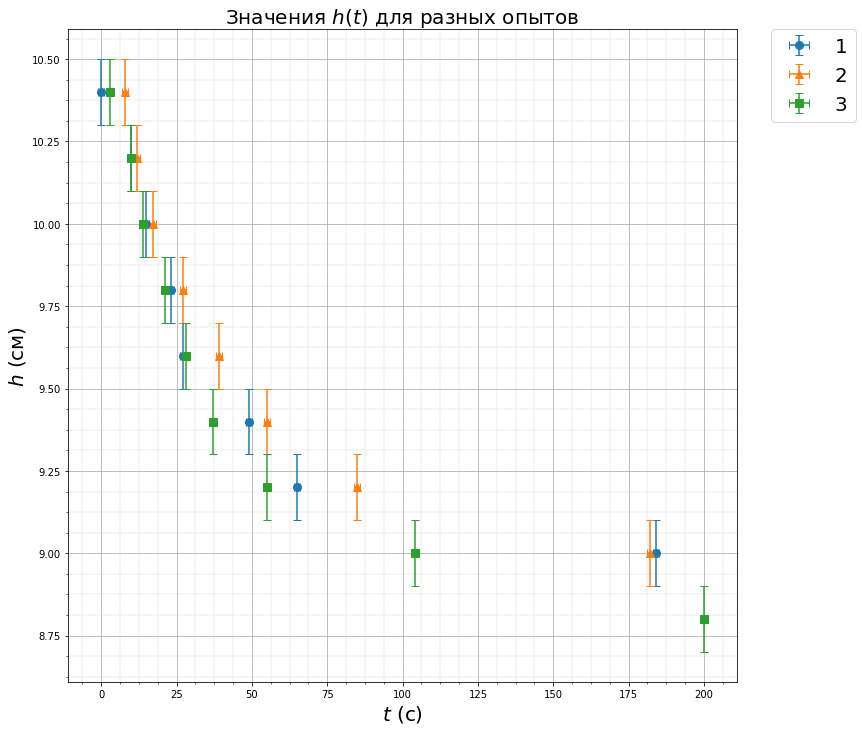

In [3]:
markers = ['o', '^', 's']
plt.figure(figsize = (12, 12))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.title('Значения $h(t)$ для разных опытов', fontsize=20)
plt.xlabel('$t$ (с)', fontsize=20)
plt.ylabel('$h$ (см)', fontsize=20)
for i in range(3):
    #plt.plot(ht_data[i][1], ht_data[i][0], linestyle='', marker=markers[i], markersize=8, label=i+1)
    plt.errorbar(ht_data[i][1], ht_data[i][0], 
                 linestyle='', marker=markers[i], markersize=8, label=i+1, xerr=1, yerr=0.1, capsize=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

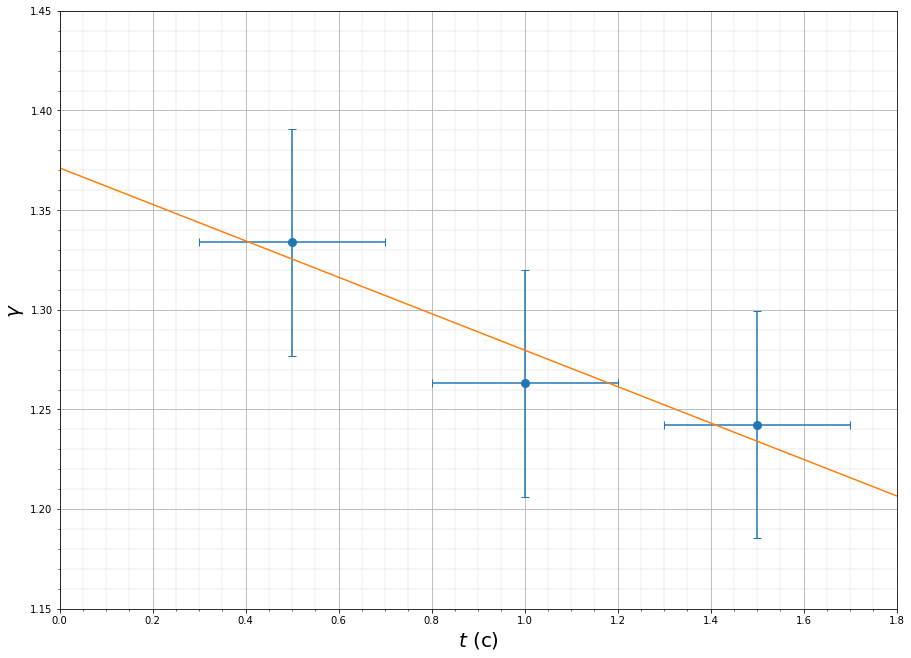

1.3620409523815233

In [46]:
from scipy.optimize import curve_fit

xdata = np.array([0.5, 1, 1.5])
ydata = np.array([t1[2].mean(), t2[2].mean(), t3[2].mean()])

def f(x, a, b):
    return a * x + b

gamma_opt, gamma_cov = curve_fit(f, xdata, ydata)

plt.figure(figsize = (15, 11))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$t$ (с)', fontsize=20)
plt.ylabel('$\gamma$', fontsize=20)
plt.xlim(0, 1.8)
plt.ylim(1.15, 1.45)
plt.errorbar(xdata, ydata, linestyle='', marker='o', markersize=8, 
             label=i+1, xerr=0.2, yerr=0.057, capsize=4)
xdata = np.arange(0, 1.9, 1.8)
plt.plot(xdata, f(xdata, *gamma_opt))
plt.show()

f(0.1, *gamma_opt)

$$\gamma(0,1\text{с}) \approx 1,362$$

$$\Downarrow$$

$$\frac{C_p}{C_p-R} = \frac{1}{1-\frac{R}{C_p}} \approx 1,362$$

$$\Downarrow$$

$$\frac{C_p}{R} \approx \frac{1}{1-\frac{1}{1,362}} \approx 3,76$$

$$C_p \approx 31,26 \frac{\text{Дж}}{\text{моль}\cdot\text{К}}$$

$$C_\text{уд} \approx 710,5 \frac{\text{Дж}}{\text{кг}\cdot\text{К}}$$

In [40]:
xdata = np.array([0.5, 1, 1.5])
print(xdata, ydata)
print(*[f(xdata[i], *gamma_opt) for i in range(3)])
print(*[ydata[i] - f(xdata[i], *gamma_opt) for i in range(3)])
sigma = [(ydata[i] - f(xdata[i], *gamma_opt))**2 for i in range(len(xdata))]
print(sigma)
print(sum(sigma) / 6.)

[0.5 1.  1.5] [1.3338     1.26314286 1.2424    ]
1.3254809523805713 1.2797809523793813 1.2340809523781913
0.008319047619428588 -0.016638095236524153 0.008319047621808906
[6.920655329432045e-05, 0.0002768262130996477, 6.920655333392442e-05]
6.92065532879821e-05


Среднеквадратичная (случайная) погрешность измерения $\gamma$

$$\sigma_\text{случ} \approx 6,92\cdot10^{-5}$$

$\sigma_t = 0,2$ с, $\sigma_h = 0,1$ см,

$$ \frac{\sigma_t}{t} = \frac{0,2}{5} = 0,04 $$

$$ \frac{\sigma_h}{h} = \frac{0,1}{8} = 0,0125 $$

$$ \frac{\sigma_\text{сист}}{\gamma} = \sqrt{\left(\frac{\sigma_t}{t}\right)^2 + \left(\frac{\sigma_h}{h}\right)^2} \approx 0,042 .$$

Отсюда $\sigma_\text{сист} \approx 0,057$

$$\sigma_\gamma = \sqrt{\sigma_\text{случ}^2 + \sigma_\text{сист}^2} \approx 0,057 $$

Как и ожидалось, случайная погрешность значительного вклада не внесла.

In [45]:
(0.057**2 + (6.92*1e-5)**2)**0.5

0.05700004200559856